Código del laboratorio anterior que utilizaremos en este

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
X = df[['RM']].values
y = df['MEDV'].values
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None


Utilizamos esta vez la librería de Sklearn de regresor lineal (mostrando su pendiente y ordenada)

Slope: 9.102
Intercept: -34.671


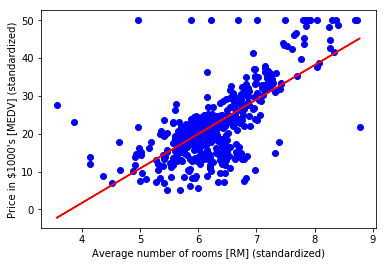

In [9]:
from sklearn.linear_model import LinearRegression 
slr = LinearRegression() 
slr.fit(X, y) 
print('Slope: %.3f' % slr.coef_[0]) 
print('Intercept: %.3f' % slr.intercept_)
lin_regplot(X, y, slr) 
plt.xlabel('Average number of rooms [RM] (standardized)') 
plt.ylabel('Price in $1000\'s [MEDV] (standardized)') 
plt.show()

Aplicamos una separación hold-out para dividiendo el dataset en entrenamiento (70%) y prueba.

In [10]:
from sklearn.model_selection import train_test_split
X=df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression() 
slr.fit(X_train, y_train) 

y_train_pred = slr.predict(X_train) 
y_test_pred = slr.predict(X_test)
from sklearn.metrics import mean_squared_error 
#Calcular el mse utilizando la función 

In [ ]:
#Repetir lo mismo pero con todas las variables

El coeficiente r2 ( o coeficiente de determinación) nos indica que tan bien el modelo puede replicar un resultado basandose en la proporción total de variaciones de salida. R2 es una versión normalizada del MSE

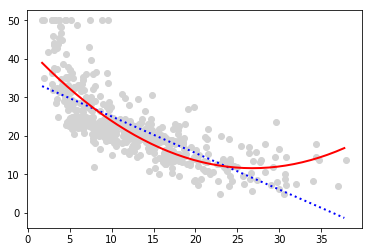

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np
X = df[['LSTAT']].values 
y = df['MEDV'].values 
regr = LinearRegression() 
#lineal
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis] 
regr = regr.fit(X, y) 
y_lin_fit = regr.predict(X_fit) 
linear_r2 = r2_score(y, regr.predict(X))

#cuadratico
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X) 
regr = regr.fit(X_quad, y) 
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit)) 
quadratic_r2 = r2_score(y, regr.predict(X_quad)) 
##Generar el mismo entrenamiento pero para función cúbica

##ploteo de resultados
plt.scatter(X, y, label='training points',color='lightgray') 
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2,linestyle=':') 
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2), $R^2=%.2f$'% quadratic_r2,color='red', lw=2, linestyle='-')


In [16]:
X_log = np.log(X)
y_sqrt = np.sqrt(y) 
X_fit = np.arange(X_log.min()-1,X_log.max()+1, 1)[:, np.newaxis] 
#Realice todo el entrenamiento y posterior ploteo al igual que en la parte anterior
